In [29]:
## chapter 3

In [28]:
import torch
from mxnet import nd
from time import time

In [3]:
a = nd.ones(shape=1000)
b = nd.ones(shape=1000)


In [4]:
start = time()
c = nd.zeros(shape=1000)
for i in range(1000):
    c[i] = a[i] + b[i]
time() - start

0.1934816837310791

In [6]:
start = time()
d = a + b # vectorization
time() - start

0.0009980201721191406

In [30]:
###

In [7]:
a = nd.ones(shape=3)
b = 10
a + b


[11. 11. 11.]
<NDArray 3 @cpu(0)>

In [12]:
## - linear regression

In [11]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

In [15]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale = 0.01, shape = labels.shape)




In [32]:
#help(nd.random.normal)

In [16]:
features[0], labels[0]

(
 [-0.15963984  1.7974477 ]
 <NDArray 2 @cpu(0)>, 
 [-2.21596]
 <NDArray 1 @cpu(0)>)

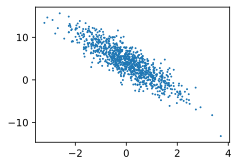

In [17]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);  # 加分号只显示图

In [35]:
## 3.2.2
# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)  # take函数根据索引返回对应元素

In [37]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-0.26284167  0.3294624 ]
 [ 1.0532751  -1.1143918 ]
 [-0.8469943  -1.2777985 ]
 [-0.07894111 -0.4506891 ]
 [-0.30851042  0.30758053]
 [ 1.5903362   0.8470414 ]
 [ 1.9407226  -0.16470501]
 [-1.327866   -0.76960164]
 [-0.39918414  1.5142757 ]
 [ 0.09886706 -0.35140982]]
<NDArray 10x2 @cpu(0)> 
[ 2.5573163 10.09212    6.854514   5.5706124  2.5421493  4.4942756
  8.642034   4.18095   -1.7427895  5.5948033]
<NDArray 10 @cpu(0)>


In [20]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [51]:
x = nd.array([[1,2],[3,4]])
y = nd.array([0.5, 2])

print(nd.dot(x, y))
#print(x.mulmat(y))

print(x * y)
print(nd.multiply(x, y))


[4.5 9.5]
<NDArray 2 @cpu(0)>

[[0.5 4. ]
 [1.5 8. ]]
<NDArray 2x2 @cpu(0)>

[[0.5 4. ]
 [1.5 8. ]]
<NDArray 2x2 @cpu(0)>


In [54]:
#help(w.attach_grad)

In [21]:
w.attach_grad()
b.attach_grad()

In [22]:
def linreg(X, w, b):  # 本函数已保存在d2lzh包中方便以后使用
    return nd.dot(X, w) + b

In [23]:
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh包中方便以后使用
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [24]:
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh包中方便以后使用
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [25]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.039271
epoch 2, loss 0.000150
epoch 3, loss 0.000052


In [26]:
true_w, w

([2, -3.4], 
 [[ 1.9993389]
  [-3.3995225]]
 <NDArray 2x1 @cpu(0)>)

In [27]:
true_b, b

(4.2, 
 [4.1991262]
 <NDArray 1 @cpu(0)>)